In [ ]:
# importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

# allowing all the columns to be visualized
pd.options.display.max_columns = None

# rendering all graphics straight out of the notebook
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Variable Dictionary
These are the descriptions of the features provided by [Spotify](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/) on their Spotify for Develepors documentation:

* artist_name - Name of the artist
* track_name - Name of the track
* track_id - Id of the track
* popularity - Popularity of the track (The higher, the more popular it is)
* danceability - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. The distribution of values for this feature look like this:<p><img alt='danceability' height="150" src="https://developer.spotify.com/assets/audio/danceability.png" align="center" hspace="10px" vspace="0px"></p>
* energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. The distribution of values for this feature look like this: <p><img alt='energy' height="150" src="https://developer.spotify.com/assets/audio/energy.png" align="center" hspace="10px" vspace="0px"></p>
* key - 	The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. The distribution of values for this feature look like this: <p><img height="150" src="https://developer.spotify.com/assets/audio/loudness.png" align="center" hspace="10px" vspace="0px"></p>
* mode - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* speechiness - 	Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. The distribution of values for this feature look like this: <p><img height="150" src="https://developer.spotify.com/assets/audio/speechiness.png" align="center" hspace="10px" vspace="0px"></p>
* acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. The distribution of values for this feature look like this: <p><img height="150" src="https://developer.spotify.com/assets/audio/acousticness.png" align="center" hspace="10px" vspace="0px"></p>
* instrumentalness - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. The distribution of values for this feature look like this: <p><img height="150" src="https://developer.spotify.com/assets/audio/instrumentalness.png" align="center" hspace="10px" vspace="0px"></p>
* liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. The distribution of values for this feature look like this: <p><img height="150" src="https://developer.spotify.com/assets/audio/liveness.png" align="center" hspace="10px" vspace="0px"></p>
* valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). The distribution of values for this feature look like this: <p><img height="150" src="https://developer.spotify.com/assets/audio/valence.png" align="center" hspace="10px" vspace="0px"></p>
* tempo - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. The distribution of values for this feature look like this: <p><img height="150" src="https://developer.spotify.com/assets/audio/tempo.png" align="center" hspace="10px" vspace="0px"></p>
* duration_ms - The duration of the track in milliseconds.
* time_signature - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

In [ ]:
# importing the data
df = pd.read_csv('/content/spotify_data(1).csv', index_col=0)
df.head()

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,The Weeknd,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,91,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040,4
1,Hotel Ugly,Shut up My Moms Calling,3hxIUxnT27p5WcmjGUXNwx,82,0.485,0.409,9,-10.711,0,0.1010,0.32500,0.000000,0.1030,0.376,138.419,164571,4
2,The Weeknd,Save Your Tears,5QO79kh1waicV47BqGRL3g,89,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,215627,4
3,Playboi Carti,Sky,29TPjc8wxfz4XMn21O7VsZ,83,0.785,0.903,2,-4.184,1,0.2100,0.25800,0.000000,0.1690,0.565,139.980,193234,4
4,$uicideboy$,"...And to Those I Love, Thanks for Sticking Ar...",30QR0ndUdiiMQMA9g1PGCm,82,0.792,0.511,2,-6.876,1,0.0409,0.12400,0.000090,0.1400,0.111,113.983,168490,4


In [ ]:
# shape of the dataset
print("Data Frame Dimensions:")
print("Lines:\t\t{}".format(df.shape[0]))
print("Columns:\t{}".format(df.shape[1]))

Data Frame Dimensions:
Lines:		963
Columns:	17


In [ ]:
# information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 0 to 962
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       963 non-null    object 
 1   track_name        963 non-null    object 
 2   track_id          963 non-null    object 
 3   popularity        963 non-null    int64  
 4   danceability      963 non-null    float64
 5   energy            963 non-null    float64
 6   key               963 non-null    int64  
 7   loudness          963 non-null    float64
 8   mode              963 non-null    int64  
 9   speechiness       963 non-null    float64
 10  acousticness      963 non-null    float64
 11  instrumentalness  963 non-null    float64
 12  liveness          963 non-null    float64
 13  valence           963 non-null    float64
 14  tempo             963 non-null    float64
 15  duration_ms       963 non-null    int64  
 16  time_signature    963 non-null    int64  
dt

In [ ]:
# statistical distribution of the data
df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000
mean,70.615784,0.664941,0.590618,5.332295,-7.399706,0.620976,0.120457,0.286081,0.036846,0.177280,0.483237,122.651028,189169.807892,3.914849
std,5.466762,0.164139,0.190477,3.525032,4.047528,0.485396,0.116739,0.285277,0.158518,0.132963,0.228703,30.820273,51483.239957,0.421631
min,60.000000,0.000000,0.000020,0.000000,-33.613000,0.000000,0.000000,0.000013,0.000000,0.031100,0.000000,0.000000,51914.000000,0.000000
25%,66.000000,0.569000,0.479000,2.000000,-8.371500,0.000000,0.040100,0.046800,0.000000,0.099900,0.324000,97.619500,160000.000000,4.000000
50%,70.000000,0.684000,0.609000,6.000000,-6.585000,1.000000,0.065700,0.172000,0.000000,0.121000,0.480000,123.396000,188307.000000,4.000000
75%,74.000000,0.782500,0.723000,8.000000,-5.169000,1.000000,0.164500,0.465500,0.000088,0.209000,0.650500,144.005000,213986.500000,4.000000
max,91.000000,0.980000,0.988000,11.000000,1.060000,1.000000,0.777000,0.996000,1.000000,0.932000,0.969000,207.947000,646239.000000,5.000000


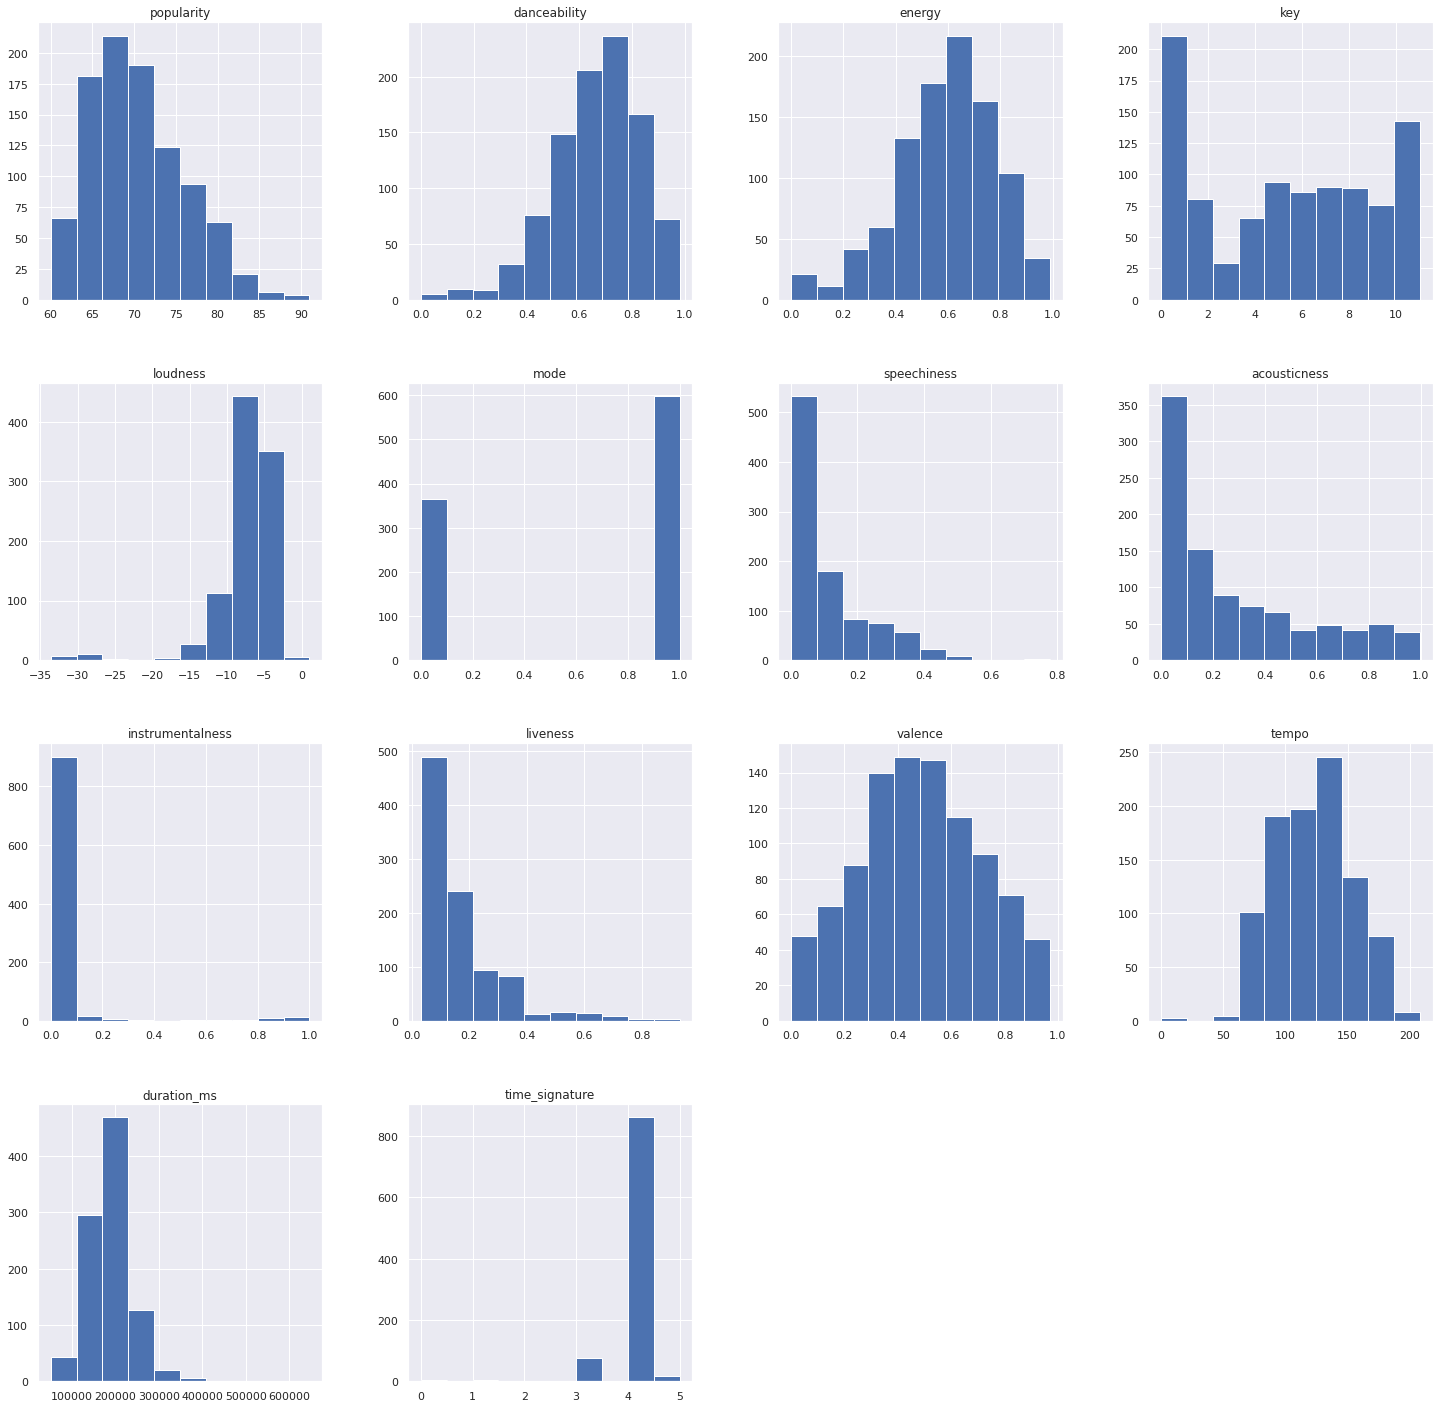

In [ ]:
# plotting histograms
df.hist(figsize=(25,25));

In [ ]:
# unique values
print("\nUNIQUE VALUES:")
print(df.nunique().sort_values())


UNIQUE VALUES:
mode                  2
time_signature        5
key                  12
popularity           31
instrumentalness    415
liveness            446
artist_name         448
danceability        477
energy              518
valence             588
speechiness         602
acousticness        726
loudness            915
tempo               940
duration_ms         947
track_name          959
track_id            963
dtype: int64


In [ ]:
# statistical distribution of categorical values
df.describe(include="O")

,artist_name,track_name,track_id
count,963,963,963
unique,448,959,963
top,Bad Bunny,21,0VjIjW4GlUZAMYd2vXMi3b
freq,33,2,1


In [ ]:
# checking most recurrent artists in Brazil
n = 10
print("Most Famous Artists in the world")
df['artist_name'].value_counts()[:n]

Most Famous Artists in the world


Bad Bunny        33
Taylor Swift     26
Juice WRLD       20
Pop Smoke        14
Lil Baby         13
The Weeknd       13
Playboi Carti    13
Miracle Tones    13
Zach Bryan       12
Lil Uzi Vert     12
Name: artist_name, dtype: int64

In [ ]:
# creating a new dataset with the top 150 songs
df_top = df.copy()
df_top = df_top.iloc[:150]
df_top.head(10)

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,The Weeknd,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,91,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.3340,171.005,200040,4
1,Hotel Ugly,Shut up My Moms Calling,3hxIUxnT27p5WcmjGUXNwx,82,0.485,0.409,9,-10.711,0,0.1010,0.32500,0.000000,0.1030,0.3760,138.419,164571,4
2,The Weeknd,Save Your Tears,5QO79kh1waicV47BqGRL3g,89,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.6440,118.051,215627,4
3,Playboi Carti,Sky,29TPjc8wxfz4XMn21O7VsZ,83,0.785,0.903,2,-4.184,1,0.2100,0.25800,0.000000,0.1690,0.5650,139.980,193234,4
4,$uicideboy$,"...And to Those I Love, Thanks for Sticking Ar...",30QR0ndUdiiMQMA9g1PGCm,82,0.792,0.511,2,-6.876,1,0.0409,0.12400,0.000090,0.1400,0.1110,113.983,168490,4
5,Glass Animals,Heat Waves,3USxtqRwSYz57Ewm6wWRMp,84,0.761,0.525,11,-6.900,1,0.0944,0.44000,0.000007,0.0921,0.5310,80.870,238805,4
6,Taylor Swift,august,3hUxzQpSfdDqwM3ZTFQY0K,86,0.532,0.623,5,-9.208,1,0.0331,0.53800,0.000073,0.0925,0.4030,89.937,261923,4
7,SZA,Good Days,3YJJjQPAbDT7mGpX3WtQ9A,82,0.436,0.655,1,-8.370,0,0.0583,0.49900,0.000008,0.6880,0.4120,121.002,279204,4
8,Conan Gray,Heather,4xqrdfXkTW4T0RauPLv3WA,87,0.357,0.425,5,-7.301,1,0.0333,0.58400,0.000000,0.3220,0.2700,102.078,198040,3
9,Elley Duhé,MIDDLE OF THE NIGHT,58HvfVOeJY7lUuCqF0m3ly,90,0.410,0.611,4,-8.271,0,0.0467,0.02280,0.000000,0.1160,0.0899,185.727,184448,3


In [ ]:
# statistical distribution of categorical values
df_top.describe(include="O")

,artist_name,track_name,track_id
count,150,150,150
unique,90,150,150
top,Bad Bunny,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b
freq,10,1,1


**Most Famous Artists in Brazil**

In [ ]:
# checking most recurrent artists in Brazil
n = 10
print("Most Famous Artists in Brazil")
df_top['artist_name'].value_counts()[:n]

Most Famous Artists in Brazil


Bad Bunny        10
Juice WRLD        6
Pop Smoke         6
Taylor Swift      5
Polo G            4
21 Savage         4
Ariana Grande     4
The Weeknd        4
Playboi Carti     4
Don Toliver       3
Name: artist_name, dtype: int64

**Top Songs From Top Artist**

In [ ]:
# top songs from the top artist
df_top.loc[df['artist_name'] == 'Bad Bunny']

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
38,Bad Bunny,DÁKITI,47EiUVwUp4C9fGccaPuUCS,83,0.731,0.573,4,-10.059,0,0.0544,0.4010,0.000052,0.1130,0.145,109.928,205090,4
41,Bad Bunny,La Santa,69vlMrzHwATKzupwNcUPyK,84,0.744,0.868,1,-4.524,1,0.0470,0.0326,0.000000,0.0822,0.586,93.037,206420,4
53,Bad Bunny,Si Veo a Tu Mamá,41wtwzCZkXwpnakmwJ239F,82,0.900,0.603,2,-5.313,1,0.0646,0.4020,0.000005,0.1340,0.824,129.928,170972,4
75,Bad Bunny,Safaera,2DEZmgHKAvm41k4J3R2E9Y,80,0.607,0.829,2,-4.074,1,0.3790,0.0103,0.000000,0.1070,0.685,96.172,295177,4
79,Bad Bunny,Yo Perreo Sola,0SqqAgdovOE24BzxIClpjw,79,0.860,0.758,11,-5.160,1,0.0695,0.0210,0.000065,0.3440,0.453,97.014,172127,4
82,Bad Bunny,LA NOCHE DE ANOCHE,2XIc1pqjXV3Cr2BQUGNBck,83,0.856,0.618,7,-4.892,1,0.2860,0.0303,0.000000,0.0866,0.391,81.993,203201,4
87,Bad Bunny,TE MUDASTE,5RubKOuDoPn5Kj5TLVxSxY,81,0.811,0.637,10,-4.835,0,0.0591,0.2340,0.000572,0.1180,0.471,92.025,130014,4
95,Bad Bunny,La Difícil,6NfrH0ANGmgBXyxgV2PeXt,80,0.685,0.848,8,-4.561,0,0.0858,0.0861,0.000007,0.0783,0.761,179.870,163084,4
120,Bad Bunny,A Tu Merced,4r9jkMEnArtWGH2rL2FZl0,84,0.860,0.791,0,-4.784,1,0.0568,0.1690,0.000106,0.1060,0.887,92.023,175918,4
146,Bad Bunny,Bichiyal,4j4w4CXm6BSr0s25wAWrrX,78,0.737,0.766,10,-4.242,0,0.0458,0.3100,0.000007,0.1140,0.662,93.956,196500,4


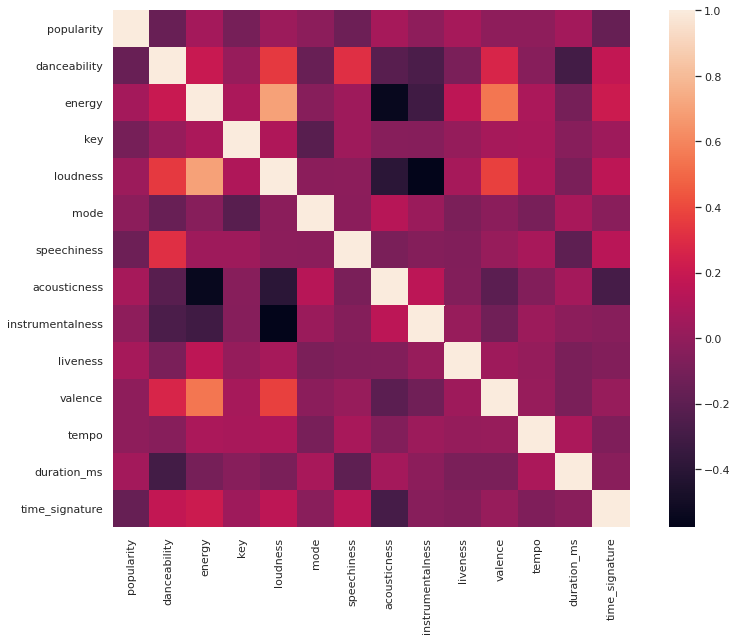

In [ ]:
# creating a correlation matrix
corr = df_top.corr()

# plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(corr, square=True, linecolor='white', vmax=1.0, annot=False,);
plt.tight_layout()


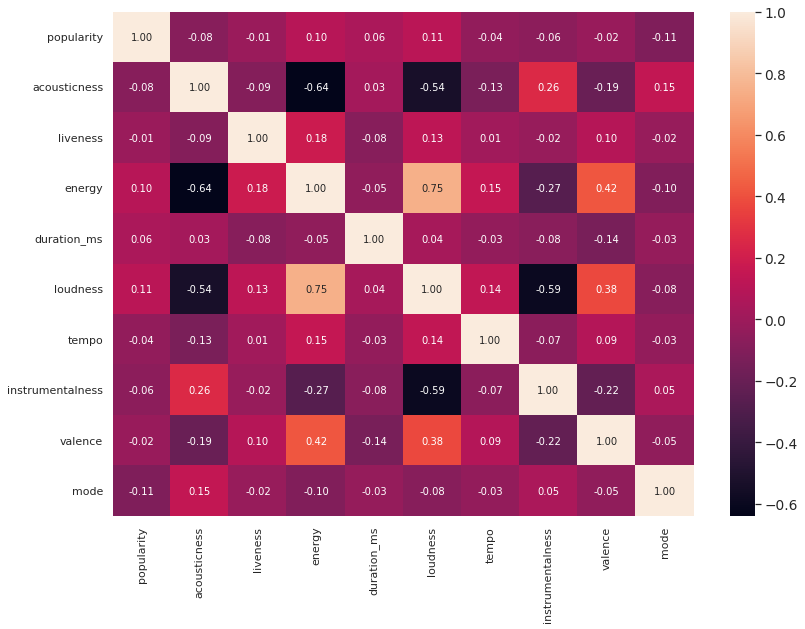

In [ ]:
# focused heatmap - Popularity
# number of variables to be selected
k = 10

# finding the most correlated variables
cols = corr.nlargest(k, 'popularity')['popularity'].index
cm = np.corrcoef(df[cols].values.T)

#plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()


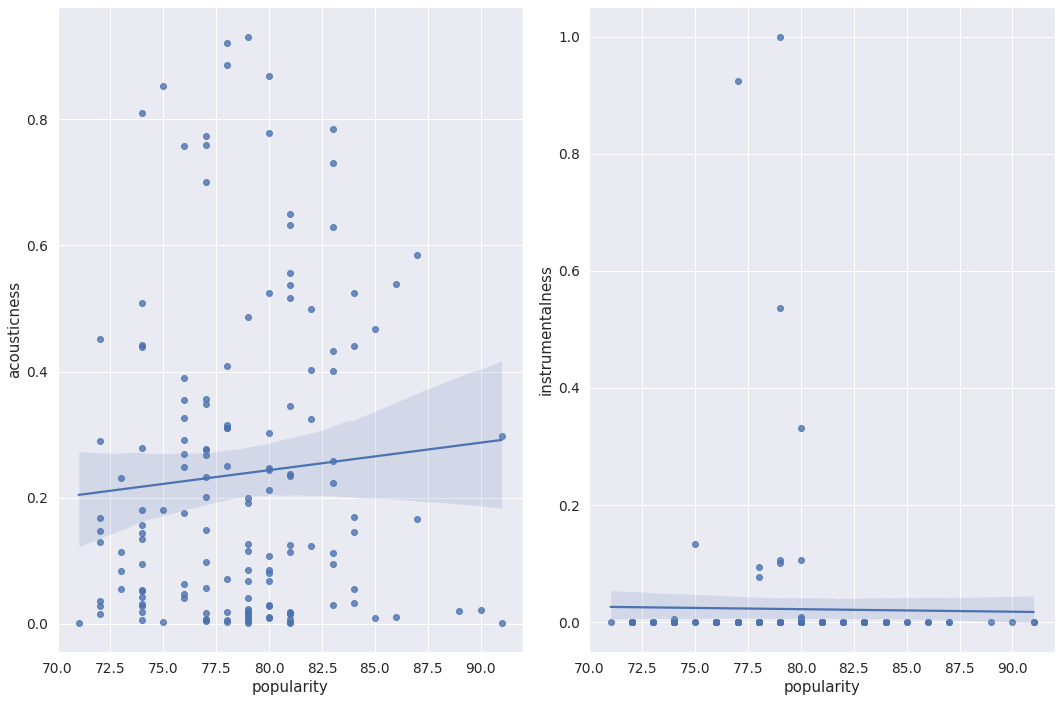

In [ ]:
# scatter plots with linear regression line
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(15,10));
sns.regplot(x=df_top['popularity'], y=df_top['acousticness'], ax=ax1);
sns.regplot(x=df_top['popularity'], y=df_top['instrumentalness'], ax=ax2);
plt.tight_layout()

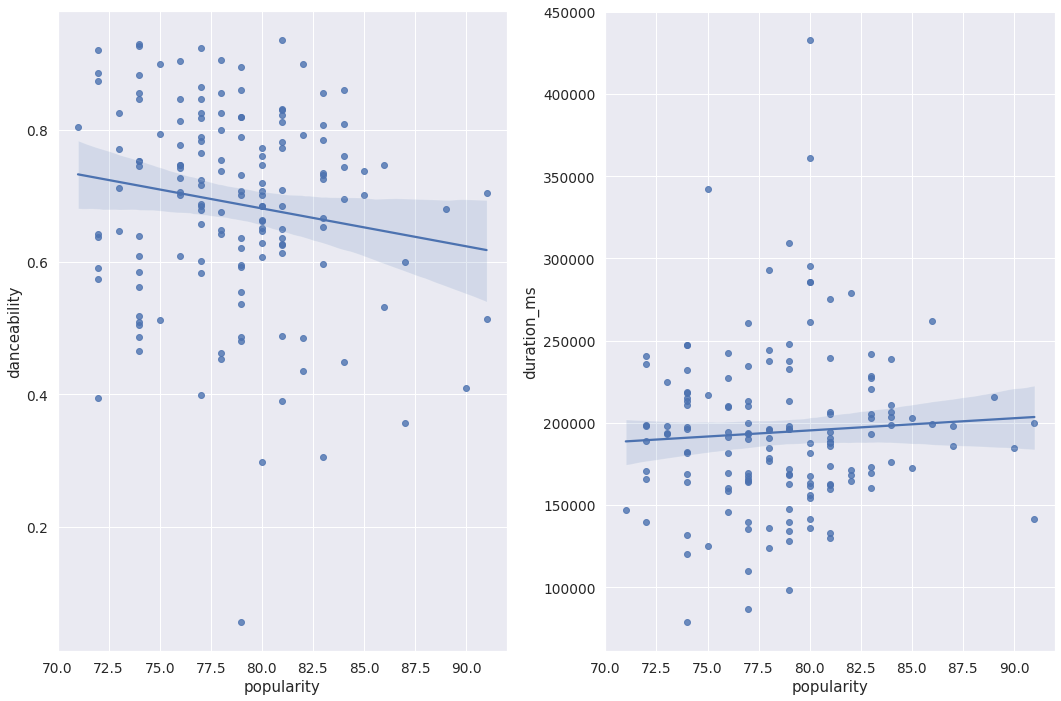

In [ ]:
# scatter plot with linear regression line
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(15,10));
sns.regplot(x=df_top['popularity'], y=df_top['danceability'], ax=ax1)
sns.regplot(x=df_top['popularity'], y=df_top['duration_ms'], ax=ax2)
plt.tight_layout()

### Machine Learning
Now that we've analyzed our dataset and learned a little bit more about the english music scene, it's time to do what we are here for: Machine Learning.

**Spotify** uses an extremely well-built recommendation system. They've been working on it for years, thoroughly developing their algorithms and testing countless hypotheses with teams of top of the class Data Scientists. It would be naive of me to even mention that my project can be as good as what they do. But that's not the goal.

> The goal is to come up with a concept, that could be polished into a feature in a recommendation environment, to be further tested and improved, aiming to deliver a more complete experience for their users.

For that, we'll use a simple `Clustering` algorithm, to help us organize and recommend the best songs for our users.

In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [ ]:
# creating a copy of the dataset
df_cluster = df.copy()
df_cluster = df_cluster.iloc[:500]

In [ ]:
df_cluster.to_csv('spotify_data(2).csv', index=0)

In [ ]:
# creating a dataframe without the categorical features
X = pd.DataFrame(df_cluster.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14,15,16]].values)

In [ ]:
df_cluster.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature'],
      dtype='object')

In [ ]:
cols = df_cluster.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14,15,16]].columns

In [ ]:
X.columns = cols

In [ ]:
X.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,91.0,0.514,0.730,1.0,-5.934,1.0,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040.0,4.0
1,82.0,0.485,0.409,9.0,-10.711,0.0,0.1010,0.32500,0.000000,0.1030,0.376,138.419,164571.0,4.0
2,89.0,0.680,0.826,0.0,-5.487,1.0,0.0309,0.02120,0.000012,0.5430,0.644,118.051,215627.0,4.0
3,83.0,0.785,0.903,2.0,-4.184,1.0,0.2100,0.25800,0.000000,0.1690,0.565,139.980,193234.0,4.0
4,82.0,0.792,0.511,2.0,-6.876,1.0,0.0409,0.12400,0.000090,0.1400,0.111,113.983,168490.0,4.0


In [ ]:
print(X.shape)
df_cluster.head()

(500, 14)


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,The Weeknd,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,91,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040,4
1,Hotel Ugly,Shut up My Moms Calling,3hxIUxnT27p5WcmjGUXNwx,82,0.485,0.409,9,-10.711,0,0.1010,0.32500,0.000000,0.1030,0.376,138.419,164571,4
2,The Weeknd,Save Your Tears,5QO79kh1waicV47BqGRL3g,89,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,215627,4
3,Playboi Carti,Sky,29TPjc8wxfz4XMn21O7VsZ,83,0.785,0.903,2,-4.184,1,0.2100,0.25800,0.000000,0.1690,0.565,139.980,193234,4
4,$uicideboy$,"...And to Those I Love, Thanks for Sticking Ar...",30QR0ndUdiiMQMA9g1PGCm,82,0.792,0.511,2,-6.876,1,0.0409,0.12400,0.000090,0.1400,0.111,113.983,168490,4


### Elbow Method - Finding out the right number of clusters

For KMeans we have to set a number of clusters for our data to be divided in. Since this is, at first, a completely arbitrary task, we have to look for options to make it as precise as possible.

One of the most popular methods to do so is the Elbow Method. Basically, we calculate different scenarios for different numbers of clusters and then plot them in a line. 

> The number we're looking for is the position where the line starts to flatten, making it look like an elbow for the plot. After some testing, I've figured out that 3 clusters yield better results.

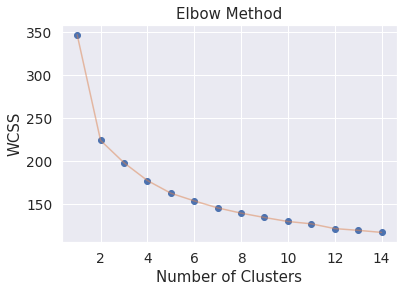

In [ ]:
# finding out the proper number of clusters
wcss = []
for i in range(1,15):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1 , 15) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

In [ ]:
wcss

[346.5604579427658,
 223.8863418323523,
 198.00170659943444,
 177.3597849813049,
 162.65862483432255,
 153.76586837674182,
 145.6563932248838,
 139.52743868784302,
 134.47956284075656,
 129.8647496772137,
 127.14101333897236,
 121.60626396760341,
 119.59424809349997,
 117.16531656270281]

In [ ]:
# data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaled = pd.DataFrame(scaler.fit_transform(X))
scaled.columns = cols

In [ ]:
scaled.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.000000,0.524490,0.745014,0.090909,0.838070,1.0,0.110536,0.001255,0.000095,0.062703,0.345041,0.838597,0.240344,0.8
1,0.666667,0.494898,0.413635,0.818182,0.676445,0.0,0.186691,0.326163,0.000000,0.078741,0.388430,0.678797,0.179958,0.8
2,0.925926,0.693878,0.844118,0.000000,0.853194,1.0,0.057116,0.021079,0.000012,0.609309,0.665289,0.578914,0.266881,0.8
3,0.703704,0.801020,0.923607,0.181818,0.897280,1.0,0.388170,0.258880,0.000000,0.158326,0.583678,0.686452,0.228757,0.8
4,0.666667,0.808163,0.518933,0.181818,0.806198,1.0,0.075601,0.124313,0.000090,0.123357,0.114669,0.558965,0.186630,0.8


In [ ]:
scaled= scaler.fit_transform(X)

### K-Means
Now that our data is ready, let's start working with K-Means to cluster our data points.
<center><img width="60%" src="https://i.imgur.com/S65Sk9c.jpg"></center>

The goal here is to organize the songs in clusters, where similar songs are put together.



In [ ]:
# instantiating model
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(scaled)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
kmeans.cluster_centers_.shape

(3, 14)

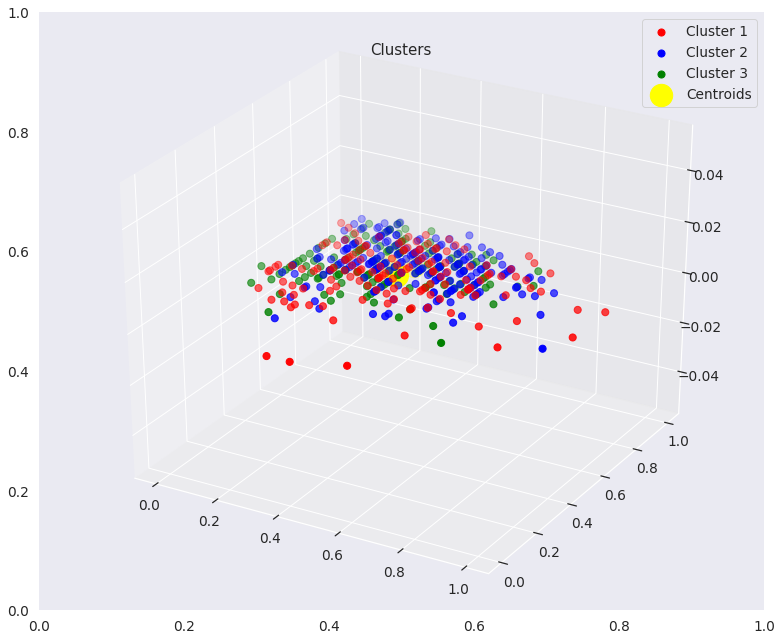

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# visualizing clusters
fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(scaled[y_kmeans == 0,0], scaled[y_kmeans == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(scaled[y_kmeans == 1,0], scaled[y_kmeans == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(scaled[y_kmeans == 2,0], scaled[y_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')

# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 500, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

In [ ]:
# predictions 
y_kmeans

array([0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 0, 2, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 0, 1, 1,
       1, 0, 2, 2, 1, 1, 2, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0,
       1, 2, 1, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 1, 0, 1,
       2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 0, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       0, 1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 1, 0, 1,
       1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 2, 2, 2, 0, 0, 1, 0,
       2, 2, 1, 1, 1, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1, 2, 2, 1, 2, 2, 1, 2,
       1, 1, 1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 0,
       1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 2, 1, 1, 0, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1,

In [ ]:
# converting preditcions into a df
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['k_cluster']

# predictions as a df
print(kmeans.shape)
kmeans.head()

(500, 1)


,k_cluster
0,0
1,1
2,0
3,0
4,0


In [ ]:
# concatenating the cluster column to the dataframe
df_cluster = pd.concat([df_cluster, kmeans], axis=1)

# checking the dataframe
print(df_cluster.shape)
df_cluster.head()

(500, 18)


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,k_cluster
0,The Weeknd,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,91,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040,4,0
1,Hotel Ugly,Shut up My Moms Calling,3hxIUxnT27p5WcmjGUXNwx,82,0.485,0.409,9,-10.711,0,0.1010,0.32500,0.000000,0.1030,0.376,138.419,164571,4,1
2,The Weeknd,Save Your Tears,5QO79kh1waicV47BqGRL3g,89,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,215627,4,0
3,Playboi Carti,Sky,29TPjc8wxfz4XMn21O7VsZ,83,0.785,0.903,2,-4.184,1,0.2100,0.25800,0.000000,0.1690,0.565,139.980,193234,4,0
4,$uicideboy$,"...And to Those I Love, Thanks for Sticking Ar...",30QR0ndUdiiMQMA9g1PGCm,82,0.792,0.511,2,-6.876,1,0.0409,0.12400,0.000090,0.1400,0.111,113.983,168490,4,0


In [ ]:
# checking for null
(df_cluster.isnull().sum()/ df_cluster.shape[0]).sort_values(ascending=False)

artist_name         0.0
track_name          0.0
time_signature      0.0
duration_ms         0.0
tempo               0.0
valence             0.0
liveness            0.0
instrumentalness    0.0
acousticness        0.0
speechiness         0.0
mode                0.0
loudness            0.0
key                 0.0
energy              0.0
danceability        0.0
popularity          0.0
track_id            0.0
k_cluster           0.0
dtype: float64

### Cluster Data Analysis

Having information on the clusters, we can analyze them, and see if our model did a good job.

In [ ]:
# popularity mean by cluster
df_cluster.groupby(['k_cluster']).popularity.mean().sort_values(ascending=False)

k_cluster
1    74.263682
0    74.035461
2    72.537975
Name: popularity, dtype: float64

In [ ]:
# checking number of songs in each cluster
df_cluster['k_cluster'].value_counts()

1    201
2    158
0    141
Name: k_cluster, dtype: int64

In [ ]:
# checking the songs in the cluster
df_cluster.loc[df_cluster['k_cluster'] == 2][:10]

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,k_cluster
5,Glass Animals,Heat Waves,3USxtqRwSYz57Ewm6wWRMp,84,0.761,0.525,11,-6.900,1,0.0944,0.44000,0.000007,0.0921,0.5310,80.870,238805,4,2
14,Eslabon Armado,Jugaste y Sufrí,3NqBxTOMCJ3zW9CIP51td4,81,0.390,0.499,7,-7.778,1,0.0381,0.63200,0.000497,0.1150,0.3400,200.156,275194,1,2
15,Diplo,Heartless (feat. Morgan Wallen),3FU6urUVsgXa6RBuV2PdRk,77,0.765,0.556,11,-6.417,1,0.0512,0.27500,0.000000,0.0824,0.2740,111.033,169227,4,2
19,Steve Lacy,Infrunami,0f8eRy9A0n6zXpKSHSCAEp,78,0.826,0.299,9,-7.721,1,0.0446,0.31000,0.095200,0.0758,0.2150,97.012,178328,4,2
20,Drake,Chicago Freestyle (feat. Giveon),4wVOKKEHUJxHCFFNUWDn0B,83,0.735,0.449,10,-7.507,1,0.3470,0.62900,0.000000,0.1130,0.0397,122.947,220488,4,2
21,Lee Brice,Soul,3vCUelLOtiuNF78p9LNWZF,77,0.789,0.642,11,-8.304,1,0.0352,0.35700,0.000000,0.0985,0.7550,121.003,167680,4,2
24,Chris Stapleton,You Should Probably Leave,2UikqkwBv7aIvlixeVXHWt,77,0.602,0.477,9,-8.425,1,0.0320,0.26800,0.000031,0.1730,0.5520,183.890,213493,4,2
27,Coyote Theory,This Side of Paradise,79EkGysjP2dL5GdpeQjRxT,83,0.306,0.664,9,-6.070,1,0.0276,0.43200,0.000008,0.1350,0.3210,158.283,242010,4,2
40,Don Toliver,After Party,527k23H0A4Q0UJN3vGs0Da,80,0.629,0.692,5,-8.045,1,0.0376,0.00981,0.331000,0.6030,0.4530,162.948,167916,4,2
46,Pop Smoke,What You Know Bout Love,1tkg4EHVoqnhR6iFEXb60y,81,0.709,0.548,10,-8.493,1,0.3530,0.65000,0.000002,0.1330,0.5430,83.995,160000,4,2


In [ ]:
# statistical distribution of the data in each column, for each cluster
df_cluster.groupby("k_cluster").describe() 


popularity                                                     \
               count       mean       std   min   25%   50%   75%   max   
k_cluster                                                                 
0              141.0  74.035461  5.618097  65.0  70.0  73.0  78.0  91.0   
1              201.0  74.263682  4.890309  66.0  70.0  74.0  78.0  90.0   
2              158.0  72.537975  4.549286  64.0  69.0  72.0  76.0  84.0   

          danceability                                                     \
                 count      mean       std    min     25%     50%     75%   
k_cluster                                                                   
0                141.0  0.630734  0.182194  0.000  0.5300  0.6500  0.7720   
1                201.0  0.711214  0.137206  0.218  0.6370  0.7250  0.8070   
2                158.0  0.672133  0.144242  0.244  0.5765  0.6765  0.7805   

                 energy                                                       \
             max  count      mean       std      min      25%     50%    75%   
k_cluster                                                                      
0          0.935  141.0  0.568319  0.196021  0.00832  0.43600  0.5850  0.715   
1          0.980  201.0  0.611274  0.154711  0.18200  0.51300  0.6200  0.723   
2          0.957  158.0  0.618389  0.172310  0.02480  0.50075  0.6345  0.741   

                    key                                                \
             max  count      mean       std  min  25%  50%  75%   max   
k_cluster                                                               
0          0.937  141.0  1.595745  1.621193  0.0  0.0  1.0  2.0   7.0   
1          0.977  201.0  6.074627  3.358482  0.0  4.0  6.0  9.0  11.0   
2          0.946  158.0  7.778481  1.839494  4.0  7.0  8.0  9.0  11.0   

          loudness                                                        \
             count      mean       std     min      25%     50%      75%   
k_cluster                                                                  
0            141.0 -7.599440  4.182235 -30.704 -8.87100 -6.7910 -5.18100   
1            201.0 -6.814647  2.378743 -15.506 -8.15600 -6.4390 -5.24500   
2            158.0 -6.983234  2.788809 -25.351 -8.31075 -6.5895 -5.11575   

                   mode                                    speechiness  \
             max  count mean  std  min  25%  50%  75%  max       count   
k_cluster                                                                
0         -1.148  141.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0       141.0   
1         -2.278  201.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       201.0   
2         -2.676  158.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0       158.0   

                                                                         \
               mean       std     min       25%      50%     75%    max   
k_cluster                                                                 
0          0.103325  0.105428  0.0000  0.033300  0.05590  0.1240  0.475   
1          0.130998  0.108945  0.0258  0.046700  0.08580  0.1840  0.481   
2          0.138433  0.132256  0.0244  0.041825  0.06795  0.2255  0.541   

          acousticness                                                        \
                 count      mean       std       min       25%    50%    75%   
k_cluster                                                                      
0                141.0  0.294966  0.293669  0.000210  0.032600  0.180  0.524   
1                201.0  0.239349  0.251451  0.000647  0.040600  0.143  0.346   
2                158.0  0.264298  0.255090  0.000592  0.047625  0.177  0.426   

                 instrumentalness                                          \
             max            count      mean       std  min  25%       50%   
k_cluster                                                                   
0          0.931            141.0  0.033012  0.147431  0.0  0.0  0.000002   
1          0.945            201.0 

In [ ]:
df_cluster.to_csv('df_cluster.csv', index=0)